# Aufgabe2

Der schwarze Linienzug in der Abbildung zeigt eine Skizze des Buchstabe "A". Der rote Linienzug entsteht 
durch Rotation des schwarzen im Uhrzeigersinn um 
20 Grad gegen den Uhrzeigersinn. Erstelle die Skizze in Python, beachte folgendes:

- Hinterlegen Sie die Grafik mit Gitterlinien
- Stellen Sie die Grafik unverzerrt dar

In [2]:
from IPython.display import IFrame

IFrame('Probetestat1_Aufgabe_2.png', width=600, height=500)

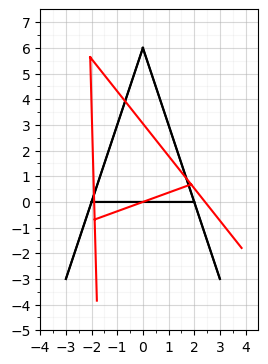

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#-------------Erstellen des Koordinatensystems--------------

#Koordinaten Grundgerüst erstellen
x_min, x_max, y_min, y_max = -4, 4.5, -5, 7.5
fig, ax = plt.subplots(figsize=(((x_max-x_min)/3), (y_max-y_min)/3))
ax.set_aspect('equal')
ax.axis([x_min,x_max,y_min,y_max])

#Haupt-Gitter erstellen (Hinterlegen des Gitters)
x_ticks_major = np.arange(x_min,x_max,1)
y_ticks_major = np.arange(y_min,y_max,1)
ax.set_xticks(x_ticks_major)
ax.set_yticks(y_ticks_major)

#Minor-Gitter
x_ticks_minor = np.arange(x_min,x_max,0.5)
y_ticks_minor = np.arange(y_min,y_max,0.5)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)

#Gitter anzeigen
ax.grid(which='minor',alpha=0.1)
ax.grid(which='major',alpha=0.5)


#-------------einzeichnen der Grafik---------------

#erste Linie
x = np.array([-3,0])
y = np.array([-3,6])
ax.plot(x,y,'-k')

#zweite Linie
x1 = np.array([0,3])
y1 = np.array([6,-3])
ax.plot(x1,y1,'-k')

#dritte Linie
x2 = np.array([-2,2])
y2 = np.array([0,0])
ax.plot(x2,y2,'-k')

#erstellen eines Trennzeichens
trennzeichen = np.array([np.nan])

#einzelne Linien verbinden
x4= np.concatenate((x, trennzeichen, x1, trennzeichen, x2))
y4= np.concatenate((y, trennzeichen, y1, trennzeichen, y2))

#einzelne Linien in einem Container abspeichern
container_x= x4
container_y= y4
ax.plot(container_x, container_y, '-k') #plotten der Linien


#---------------Rotieren der Grafik------------------

#Winkel alpha standardmäßig immer gegen Uhrzeigersinn, 20 Grad passt also, Rotationsmatrix 1 zu 1 übernommen aus Formel
Winkel_alpha = 20*np.pi/180
Rotations_Matrix = np.array([[np.cos(Winkel_alpha), -np.sin(Winkel_alpha)],[np.sin(Winkel_alpha), np.cos(Winkel_alpha)]])

#Verbinden zu einer großen Matrix
Matrix_aus = np.array([container_x, container_y])

#Rotatin der gesamten Matrix
Matrix_Rotation = Rotations_Matrix@Matrix_aus

#Aufteilen in x und y Werte
container_x_Rotiert = Matrix_Rotation[0,:]
container_y_Rotiert = Matrix_Rotation[1,:]

#plotten der rotierten Darstellung in rot
ax.plot(container_x_Rotiert, container_y_Rotiert, '-r')
plt.show() #/oder display(fig)

